UN DATASET ASSIGNMENT QUESTIONS (WK1 - Python/Pandas):

Create a seaborn FacetGrid to show the internet usage trend over time for these 5 countries (those with the highest reported internet use in 2014). Which country had the greatest growth between 2004 and 2014? Is there a plotting issue with Bermuda? Can you fix it?

Repeat the steps above to look at the trend for the 5 countries with the lowest 2014 internet usage. Which country has consistently had the least internet use?

Find the top 5 countries for 2014 in terms of GDP per capita; create a dataframe to look at 10-year trends (2004-2014, so we'll have 2004, 2009, 2014 in terms of trends) in gdp per capita for those 5 countries. Use a seaborn facet grid for this.

Repeat this one more time to look at 10-year trend for the bottom 5 countries for 2014 in terms of GDP per capita.

Is there anything surprising or unusual in any of these plots? Searching on the internet, can you find any possible explanations for unusual findings? check online for info

Bonus exercise:
Download another data set from the UN data (http://data.un.org/Explorer.aspx) to merge with your data and explore.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

%matplotlib inline

In [2]:
## Q5: Using the pandas read_csv() function, read the GDP dataset into your notebook as a DataFrame called gdp_df.
## Take a look at the first 6 rows.

In [3]:
## used nrows to filter out rows past a certain count of rows
## then checked tail to make sure which row the data ended on
gdp_df = pd.read_csv('../data/gdp_percapita.csv', nrows = 6729)
gdp_df.head(6)

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2018,1734.723214,NaN
1,Afghanistan,2017,1758.465636,NaN
2,Afghanistan,2016,1757.023490,NaN
3,Afghanistan,2015,1766.593077,NaN
4,Afghanistan,2014,1795.735834,NaN
5,Afghanistan,2013,1807.762344,NaN


In [4]:
gdp_df.tail(6)

,Country or Area,Year,Value,Value Footnotes
6723,Zimbabwe,1995,2736.486436,NaN
6724,Zimbabwe,1994,2768.309953,NaN
6725,Zimbabwe,1993,2572.870395,NaN
6726,Zimbabwe,1992,2591.007534,NaN
6727,Zimbabwe,1991,2906.272849,NaN
6728,Zimbabwe,1990,2819.549467,NaN


In [5]:
## Q6: Repeat for the internet use dataset. Call this DataFrame internet_df.
## Take a look at the first six rows.

In [6]:
## used nrows to filter out rows past a certain count of rows
## then checked tail to make sure which row the data ended on
internet_df = pd.read_csv('../data/internet_use.csv', nrows = 4495)
internet_df.head(6)

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2014,6.390000,NaN
1,Afghanistan,2013,5.900000,NaN
2,Afghanistan,2012,5.454545,NaN
3,Afghanistan,2011,5.000000,NaN
4,Afghanistan,2010,4.000000,NaN
5,Afghanistan,2009,3.550000,NaN


In [7]:
internet_df.tail(6)

,Country or Area,Year,Value,Value Footnotes
4489,Zimbabwe,1998,0.081648,NaN
4490,Zimbabwe,1997,0.033080,NaN
4491,Zimbabwe,1996,0.016790,NaN
4492,Zimbabwe,1995,0.007684,NaN
4493,Zimbabwe,1994,0.001739,NaN
4494,Zimbabwe,1990,0.000000,NaN


In [8]:
## Q7: Look at the shape of each dataframe - how many rows, how many columns.
## A7: GDP has (6731, 4), Internet has (4495,4)

In [9]:
gdp_df.shape

(6729, 4)

In [10]:
internet_df.shape

(4495, 4)

In [11]:
## Q8: Take a look at the data types for the columns in each table.

In [12]:
gdp_df.dtypes

Country or Area     object
Year                 int64
Value              float64
Value Footnotes    float64
dtype: object

In [13]:
internet_df.dtypes

Country or Area     object
Year                 int64
Value              float64
Value Footnotes    float64
dtype: object

In [14]:
## Q9: Take a look at the last 10 rows of each dataset in turn.

In [15]:
gdp_df.tail(10)

,Country or Area,Year,Value,Value Footnotes
6719,Zimbabwe,1999,3054.064189,NaN
6720,Zimbabwe,1998,3099.076182,NaN
6721,Zimbabwe,1997,3036.422224,NaN
6722,Zimbabwe,1996,2985.856605,NaN
6723,Zimbabwe,1995,2736.486436,NaN
6724,Zimbabwe,1994,2768.309953,NaN
6725,Zimbabwe,1993,2572.870395,NaN
6726,Zimbabwe,1992,2591.007534,NaN
6727,Zimbabwe,1991,2906.272849,NaN
6728,Zimbabwe,1990,2819.549467,NaN


In [16]:
internet_df.tail(10)

,Country or Area,Year,Value,Value Footnotes
4485,Zimbabwe,2002,3.994356,NaN
4486,Zimbabwe,2001,0.799846,NaN
4487,Zimbabwe,2000,0.401434,NaN
4488,Zimbabwe,1999,0.161676,NaN
4489,Zimbabwe,1998,0.081648,NaN
4490,Zimbabwe,1997,0.033080,NaN
4491,Zimbabwe,1996,0.016790,NaN
4492,Zimbabwe,1995,0.007684,NaN
4493,Zimbabwe,1994,0.001739,NaN
4494,Zimbabwe,1990,0.000000,NaN


In [17]:
## Q10: Drop the 'value footnotes' data (column) from both datasets. Check that this worked as expected.

In [18]:
gdp_df = gdp_df.drop(['Value Footnotes'], axis = 1)
gdp_df.columns

Index(['Country or Area', 'Year', 'Value'], dtype='object')

In [19]:
internet_df = internet_df.drop(['Value Footnotes'], axis = 1)
internet_df.columns

Index(['Country or Area', 'Year', 'Value'], dtype='object')

In [20]:
## Q11: Change the columns for the GDP Per Capita data frame to ‘Country’, ‘Year’, and ‘GDP_Per_Capita’.

In [21]:
gdp_df.columns = ['Country', 'Year', 'GDP_Per_Capita']
gdp_df.head()

,Country,Year,GDP_Per_Capita
0,Afghanistan,2018,1734.723214
1,Afghanistan,2017,1758.465636
2,Afghanistan,2016,1757.023490
3,Afghanistan,2015,1766.593077
4,Afghanistan,2014,1795.735834


In [22]:
## Q12: Change the columns for the Internet Users data frame to ‘Country’, ‘Year’, and ‘Internet_Users_Pct’.

In [23]:
internet_df.columns = ['Country', 'Year', 'Internet_Users_Pct']
internet_df.head()

,Country,Year,Internet_Users_Pct
0,Afghanistan,2014,6.390000
1,Afghanistan,2013,5.900000
2,Afghanistan,2012,5.454545
3,Afghanistan,2011,5.000000
4,Afghanistan,2010,4.000000


In [24]:
## Q13: Merge the two DataFrames to one. Merge all rows from each of the two DataFrames.
## Call the new DataFrame gdp_and_internet_use.

In [25]:
gdp_and_internet_use = pd.merge(gdp_df, internet_df, on = ['Country', 'Year'], how = 'outer')

In [26]:
## Q14: Look at the first five rows of your new data frame to confirm it merged correctly.

In [27]:
gdp_and_internet_use.head()

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
0,Afghanistan,2018,1734.723214,NaN
1,Afghanistan,2017,1758.465636,NaN
2,Afghanistan,2016,1757.023490,NaN
3,Afghanistan,2015,1766.593077,NaN
4,Afghanistan,2014,1795.735834,6.39


In [28]:
## Q15: Look at the last five rows to make sure the data is clean and as expected.

In [29]:
gdp_and_internet_use.tail(6)

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
7699,Virgin Islands (U.S.),1998,NaN,9.245220
7700,Virgin Islands (U.S.),1997,NaN,6.948369
7701,Virgin Islands (U.S.),1996,NaN,4.647186
7702,Virgin Islands (U.S.),1995,NaN,2.801958
7703,Virgin Islands (U.S.),1994,NaN,0.940645
7704,Virgin Islands (U.S.),1990,NaN,0.000000


In [30]:
## Q16: Subset the combined data frame to keep only the data for 2004, 2009, and 2014. 
## Check that this happened correctly.

In [31]:
year_list = ['2004', '2009', '2014']
gdp_and_internet_use_df = gdp_and_internet_use.query("Year in @year_list")
print(gdp_and_internet_use_df.shape)
gdp_and_internet_use_df.head()

(835, 4)


,Country,Year,GDP_Per_Capita,Internet_Users_Pct
4,Afghanistan,2014,1795.735834,6.390000
9,Afghanistan,2009,1502.354073,3.550000
14,Afghanistan,2004,1025.208245,0.105809
21,Albania,2014,10700.993216,60.100000
26,Albania,2009,9525.377979,41.200000


In [32]:
##nicole used:
## gdp_and_internet_use = gdp_and_internet_use[gdp_and_internet_use[“Year”].isin([2004, 2009, 2014])]

In [33]:
gdp_and_internet_use_df.tail()

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
7668,Viet Nam,2009,NaN,26.550000
7673,Viet Nam,2004,NaN,7.642409
7683,Virgin Islands (U.S.),2014,NaN,50.070000
7688,Virgin Islands (U.S.),2009,NaN,27.396510
7693,Virgin Islands (U.S.),2004,NaN,27.377009


In [34]:
## Q17: Create three new data frames, one for 2004, one for 2009, and one for 2014. 
## Give them meaningful names that aren't too long.

In [35]:
mask_2004 = gdp_and_internet_use_df['Year'] == 2004
mask_2004_df = gdp_and_internet_use_df [mask_2004]
print(mask_2004_df)

                    Country  Year  GDP_Per_Capita  Internet_Users_Pct
14              Afghanistan  2004     1025.208245            0.105809
31                  Albania  2004     7001.054082            2.420388
60                  Algeria  2004    11845.170512            4.634475
89                   Angola  2004     4604.657044            0.464815
118     Antigua and Barbuda  2004    21161.123532           24.266544
...                     ...   ...             ...                 ...
7551              Swaziland  2004             NaN            3.228685
7572                  Syria  2004             NaN            4.321594
7615     T.F.Y.R. Macedonia  2004             NaN           24.440000
7673               Viet Nam  2004             NaN            7.642409
7693  Virgin Islands (U.S.)  2004             NaN           27.377009

[278 rows x 4 columns]


In [36]:
mask_2009 = gdp_and_internet_use_df['Year'] == 2009
mask_2009_df = gdp_and_internet_use_df [mask_2009]
print(mask_2009_df)

                    Country  Year  GDP_Per_Capita  Internet_Users_Pct
9               Afghanistan  2009     1502.354073             3.55000
26                  Albania  2009     9525.377979            41.20000
55                  Algeria  2009    12697.690780            11.23000
84                   Angola  2009     6292.534856             6.00000
113     Antigua and Barbuda  2009    22568.626530            42.00000
...                     ...   ...             ...                 ...
7546              Swaziland  2009             NaN             8.94000
7567                  Syria  2009             NaN            17.30000
7610     T.F.Y.R. Macedonia  2009             NaN            51.77000
7668               Viet Nam  2009             NaN            26.55000
7688  Virgin Islands (U.S.)  2009             NaN            27.39651

[279 rows x 4 columns]


In [37]:
mask_2014 = gdp_and_internet_use_df['Year'] == 2014
mask_2014_df = gdp_and_internet_use_df [mask_2014]
print(mask_2014_df)

                    Country  Year  GDP_Per_Capita  Internet_Users_Pct
4               Afghanistan  2014     1795.735834                6.39
21                  Albania  2014    10700.993216               60.10
50                  Algeria  2014    13557.769757               18.09
79                   Angola  2014     6813.052106               21.26
108     Antigua and Barbuda  2014    20440.540555               64.00
...                     ...   ...             ...                 ...
7541              Swaziland  2014             NaN               27.10
7562                  Syria  2014             NaN               28.09
7605     T.F.Y.R. Macedonia  2014             NaN               68.06
7663               Viet Nam  2014             NaN               48.31
7683  Virgin Islands (U.S.)  2014             NaN               50.07

[278 rows x 4 columns]


In [38]:
## Q18: Which country had the highest percentage of internet users in 2014? What was the percentage?
## (Try typing the first 3 letters of your DataFrame name and hitting the tab for auto-complete options).
## A18: Iceland, 98.16%

In [39]:
mask_2014_df.sort_values(by = 'Internet_Users_Pct', ascending = False)

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
2581,Iceland,2014,42774.888849,98.16
6772,Bermuda,2014,NaN,96.80
4530,Norway,2014,63328.259526,96.30
1404,Denmark,2014,45057.083449,95.99
6732,Andorra,2014,NaN,95.90
...,...,...,...,...
6245,Tuvalu,2014,3141.056160,NaN
6418,Upper middle income,2014,14770.977043,NaN
6563,Vietnam,2014,5312.492183,NaN
6592,West Bank and Gaza,2014,4445.307470,NaN


In [40]:
## Q19: Which country had the lowest percentage of internet users in 2014? What was the percentage?
## A19: Dem.People's Rep. of Korea, 0%

In [41]:
mask_2014_df.sort_values(by = 'Internet_Users_Pct', ascending = True)

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
6940,Dem. People's Rep. of Korea,2014,NaN,0.00
6999,Eritrea,2014,NaN,0.99
6044,Timor-Leste,2014,6466.737732,1.14
794,Burundi,2014,768.469837,1.38
7521,Somalia,2014,NaN,1.63
...,...,...,...,...
6245,Tuvalu,2014,3141.056160,NaN
6418,Upper middle income,2014,14770.977043,NaN
6563,Vietnam,2014,5312.492183,NaN
6592,West Bank and Gaza,2014,4445.307470,NaN


In [42]:
## Q20: Repeat for 2004 and 2009.
## A20: 2004 -- Highest is Sweden at 83.89%; lowest is Dem. People's Rep. of Korea, 0%
## A20: 2009 -- Highest is Iceland at 93%; lowest is Dem. People's Rep. of Korea, 0%

In [43]:
mask_2004_df.sort_values(by = 'Internet_Users_Pct', ascending = False)

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
5852,Sweden,2004,40177.850408,83.89
2591,Iceland,2004,38893.378798,83.88
1414,Denmark,2004,43670.446201,80.93
4540,Norway,2004,61612.275634,77.69
7247,Korea (Rep. of),2004,NaN,72.70
...,...,...,...,...
6255,Tuvalu,2004,3037.434007,NaN
6428,Upper middle income,2004,8799.715484,NaN
6573,Vietnam,2004,3214.185135,NaN
6602,West Bank and Gaza,2004,3324.834407,NaN


In [44]:
mask_2004_df.sort_values(by = 'Internet_Users_Pct', ascending = True)

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
6949,Dem. People's Rep. of Korea,2004,NaN,0.000000
4238,Myanmar,2004,1999.710075,0.024337
3470,Liberia,2004,916.487110,0.031011
5910,Tajikistan,2004,1644.455641,0.077480
14,Afghanistan,2004,1025.208245,0.105809
...,...,...,...,...
6255,Tuvalu,2004,3037.434007,NaN
6428,Upper middle income,2004,8799.715484,NaN
6573,Vietnam,2004,3214.185135,NaN
6602,West Bank and Gaza,2004,3324.834407,NaN


In [45]:
mask_2009_df.sort_values(by = 'Internet_Users_Pct', ascending = False)

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
2586,Iceland,2009,41505.084834,93.00
4535,Norway,2009,62617.153609,92.08
5847,Sweden,2009,41327.626252,91.00
4332,Netherlands,2009,45724.862764,89.63
3615,Luxembourg,2009,89098.734264,87.31
...,...,...,...,...
6020,The Gambia,2009,2467.890291,NaN
6423,Upper middle income,2009,11631.478894,NaN
6568,Vietnam,2009,4207.756178,NaN
6597,West Bank and Gaza,2009,3816.165070,NaN


In [46]:
mask_2009_df.sort_values(by = 'Internet_Users_Pct', ascending = True)

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
6944,Dem. People's Rep. of Korea,2009,NaN,0.000000
6049,Timor-Leste,2009,9275.529371,0.185252
4233,Myanmar,2009,3387.818242,0.220000
5292,Sierra Leone,2009,1172.862734,0.260000
886,Cambodia,2009,2417.293669,0.530000
...,...,...,...,...
6020,The Gambia,2009,2467.890291,NaN
6423,Upper middle income,2009,11631.478894,NaN
6568,Vietnam,2009,4207.756178,NaN
6597,West Bank and Gaza,2009,3816.165070,NaN


In [47]:
## Q21:  Which country had the highest gdp per capita in 2014? What was the gdp per capita?

In [48]:
mask_2009_df.sort_values(by = 'Internet_Users_Pct', ascending = False)

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
2586,Iceland,2009,41505.084834,93.00
4535,Norway,2009,62617.153609,92.08
5847,Sweden,2009,41327.626252,91.00
4332,Netherlands,2009,45724.862764,89.63
3615,Luxembourg,2009,89098.734264,87.31
...,...,...,...,...
6020,The Gambia,2009,2467.890291,NaN
6423,Upper middle income,2009,11631.478894,NaN
6568,Vietnam,2009,4207.756178,NaN
6597,West Bank and Gaza,2009,3816.165070,NaN


In [49]:
mask_2009_df.sort_values(by = 'Internet_Users_Pct', ascending = True)

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
6944,Dem. People's Rep. of Korea,2009,NaN,0.000000
6049,Timor-Leste,2009,9275.529371,0.185252
4233,Myanmar,2009,3387.818242,0.220000
5292,Sierra Leone,2009,1172.862734,0.260000
886,Cambodia,2009,2417.293669,0.530000
...,...,...,...,...
6020,The Gambia,2009,2467.890291,NaN
6423,Upper middle income,2009,11631.478894,NaN
6568,Vietnam,2009,4207.756178,NaN
6597,West Bank and Gaza,2009,3816.165070,NaN


In [50]:
## Q22: Which country had the lowest gdp per capita in 2014? What was the gdp per capita?
## A22: Central African Republic at $672.681648

In [51]:
mask_2014_df.sort_values(by = 'GDP_Per_Capita', ascending = True)

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
1014,Central African Republic,2014,672.681648,NaN
794,Burundi,2014,768.469837,1.38
1375,Dem. Rep. Congo,2014,784.872656,NaN
4414,Niger,2014,900.136918,1.95
3697,Malawi,2014,1142.530804,5.83
...,...,...,...,...
7541,Swaziland,2014,NaN,27.10
7562,Syria,2014,NaN,28.09
7605,T.F.Y.R. Macedonia,2014,NaN,68.06
7663,Viet Nam,2014,NaN,48.31


In [52]:
## Q23: Create some scatterplots: 
##    a. 2004 Percent Using the Internet vs GDP Per Capita 
##    b. 2009 Percent Using the Internet vs GDP Per Capita 
##    c. 2014 Percent Using the Internet vs GDP Per Capita

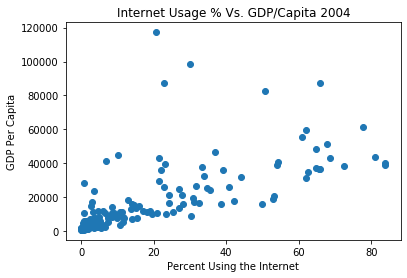

In [53]:
plt.scatter(y = 'GDP_Per_Capita', x = 'Internet_Users_Pct', data = mask_2004_df)
plt.title('Internet Usage % Vs. GDP/Capita 2004')
plt.ylabel('GDP Per Capita')
plt.xlabel('Percent Using the Internet');

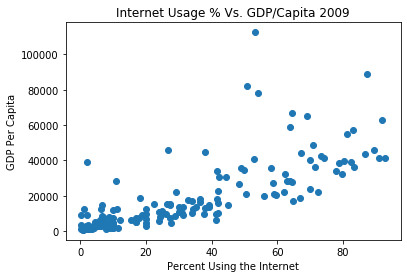

In [54]:
plt.scatter(y = 'GDP_Per_Capita', x = 'Internet_Users_Pct', data = mask_2009_df)
plt.title('Internet Usage % Vs. GDP/Capita 2009')
plt.ylabel('GDP Per Capita')
plt.xlabel('Percent Using the Internet');

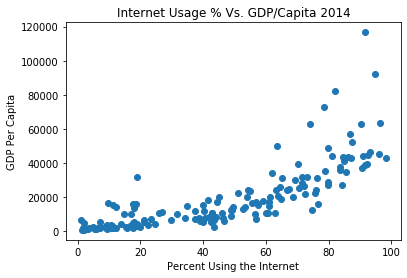

In [55]:
plt.scatter(y = 'GDP_Per_Capita', x = 'Internet_Users_Pct', data = mask_2014_df)
plt.title('Internet Usage % Vs. GDP/Capita 2014')
plt.ylabel('GDP Per Capita')
plt.xlabel('Percent Using the Internet');

In [56]:
## Q24: Are there differences across years? What do the plots tell you about any relationship between these two variables? 
## Enter your observations as a markdown cell.

### A24: The trend is flattening and is more grouped, which tells me that more countries have a high percentage of internet usage, regardless of GDP/capita.  The curve is steeper at the high usage end showing a wide gap between countries with extremely high and low GDPs.

In [57]:
## Q25: Look at the distribution of gdp per capita values for 2014. Is it unimodal?

### A25: No??

D:\Applications\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
D:\Applications\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Text(0, 0.5, 'Percent of GDP')

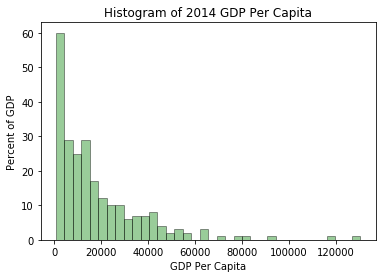

In [58]:
# matplotlib histogram
# plt.hist(mask_2014_df['GDP_Per_Capita'], color = 'green', edgecolor = 'black', bins=int(180/5))

# seaborn histogram
sns.distplot(mask_2014_df['GDP_Per_Capita'], hist=True, kde=False, 
             bins=int(180/5), color = 'green',
             hist_kws={'edgecolor':'black'})
# Add labels
plt.title('Histogram of 2014 GDP Per Capita')
plt.xlabel('GDP Per Capita')
plt.ylabel('Percent of GDP')

In [59]:
## Q26: Look at the distribution of Internet Use for 2014. Is it unimodal?

### A26: Maybe?  left-skewed?

Text(0, 0.5, 'GDP Per Capita')

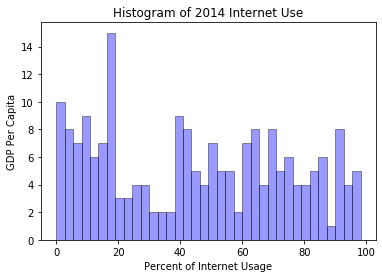

In [60]:
# matplotlib histogram
# plt.hist(mask_2014_df['Internet_Users_Pct'], color = 'blue', edgecolor = 'black', bins=int(180/5))

# seaborn histogram
sns.distplot(mask_2014_df['Internet_Users_Pct'], hist=True, kde=False, 
             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'black'})
# Add labels
plt.title('Histogram of 2014 Internet Use')
plt.xlabel('Percent of Internet Usage')
plt.ylabel('GDP Per Capita')

In [61]:
## Q27: What are the top 5 countries in terms of internet use in 2014?
## NOTE: I used same query from Q18, limiting to 5 using head function

In [62]:
mask_2014_df.sort_values(by = 'Internet_Users_Pct', ascending = False).head()

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
2581,Iceland,2014,42774.888849,98.16
6772,Bermuda,2014,NaN,96.80
4530,Norway,2014,63328.259526,96.30
1404,Denmark,2014,45057.083449,95.99
6732,Andorra,2014,NaN,95.90


In [63]:
## Q28: Create a data frame called top_5_internet from the combined data frame that has all three years
## for these 5 countries. You should have 15 rows. Check that this is true.(TRICKY QUESTION PER MARY) 
## NOTE: used similar query to Q16 to limit the countries

In [64]:
country_list = ['Iceland', 'Bermuda', 'Norway', 'Denmark', 'Andorra']
top_5_internet_df = gdp_and_internet_use_df.query("Country in @country_list").reset_index(drop=True)
## note:  the sort didn't work until inplace=True was added
top_5_internet_df.sort_values(['Country', 'Year'], inplace=True, ascending = True)
top_5_internet_df.head(15)

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
13,Andorra,2004,NaN,26.837954
12,Andorra,2009,NaN,78.530000
11,Andorra,2014,NaN,95.900000
1,Bermuda,2004,55452.638880,60.990867
0,Bermuda,2009,57151.919132,83.250000
14,Bermuda,2014,NaN,96.800000
4,Denmark,2004,43670.446201,80.930000
3,Denmark,2009,43382.615688,86.840000
2,Denmark,2014,45057.083449,95.990000
7,Iceland,2004,38893.378798,83.880000


In [65]:
## Q29: Create a seaborn FacetGrid to show the internet usage trend over time for these 5 countries
## (those with the highest reported internet use in 2014). 
## Which country had the greatest growth between 2004 and 2014? 
## Is there a plotting issue with Bermuda? Can you fix it?

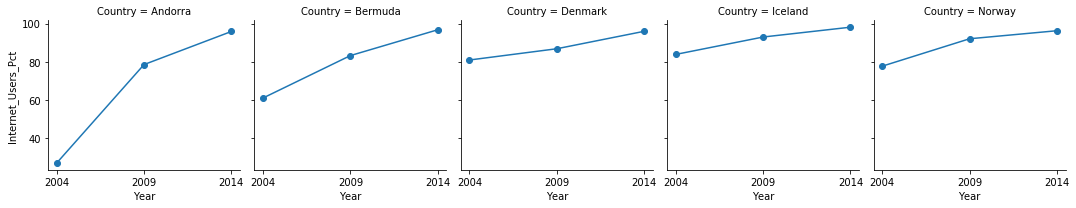

In [76]:
top_5 = sns.FacetGrid(top_5_internet_df, col = 'Country')
top_5 = top_5.map(plt.plot, 'Year', 'Internet_Users_Pct', marker = 'o')
top_5.set(xticks = [2004, 2009, 2014])